# <span style="color:black"> LSN-Esercitazione numerica 11</span>

## <span style="color:blue">  Esercizio 11.1</span>


Ho implementato il fit lineare della funzione
$$
f(x)=2x+1,
$$
attraverso l'allenamento e il test di una rete neurale costituita da un singolo neurone.
Ho costruito una funzione che crea una rete neurale con un unico neurone, la allena per *n_epochs* epoche sulla base di *trains* punti distribuiti con rumore gaussiano di varianza *sigma* attorno alla funzione $f(x)$ sopra definita e testa la rete generando *valids* punti secondo il modello così creato, in modo da poterne valutare la bontà. La funzione stampa i parametri fittati, fuznioni costo e accuratezza e mostra il fit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


In [2]:
def fit_lin(trains, valids, sigma, n_epochs):
    m = 2 # slope
    b = 1 # intersect

    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, trains)
    x_valid = np.random.uniform(-1, 1, valids)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=n_epochs,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid), verbose=0)
    print("Parametri stimati: ")
    print(model.get_weights())
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', label='Estimated function')
    plt.plot(x_valid, y_target, label='True function')
    plt.title("Linear fit - 1 neuron")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    

#### trains=100, valids=10, sigma=0, n_epochs=30 


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Parametri stimati: 
[array([[0.55638784]], dtype=float32), array([0.8119643], dtype=float32)]
10/10 [==============================] - 0s 51us/sample - loss: 0.7216 - mean_squared_error: 0.7216

Test loss: 0.7216397523880005
Test accuracy: 0.72163975


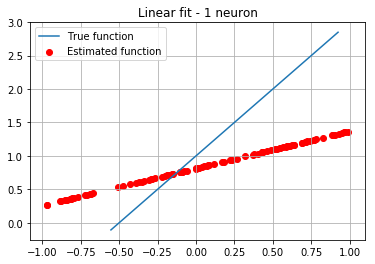

In [3]:
fit_lin(100, 10, 0, 30)

Il fit, nonostante i punti da fittare siano sulla retta stessa, non riesce a restituire parametri corretti a causa del numero di trains troppo ridotto! 

#### trains=500, valids=50, sigma=0, n_epochs=30 

Parametri stimati: 
[array([[1.8801098]], dtype=float32), array([0.99903375], dtype=float32)]
50/50 [==============================] - 0s 43us/sample - loss: 0.0046 - mean_squared_error: 0.0046

Test loss: 0.004573909919708967
Test accuracy: 0.00457391


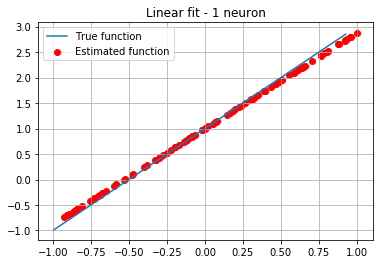

In [4]:
fit_lin(500, 50, 0, 30)

Alzando il numero di trains i parametri ottenuti sono buoni.

#### trains=500, valids=50, sigma=0.5, n_epochs=30 

Parametri stimati: 
[array([[1.9306949]], dtype=float32), array([0.9419861], dtype=float32)]
50/50 [==============================] - 0s 34us/sample - loss: 0.0045 - mean_squared_error: 0.0045

Test loss: 0.004476845599710942
Test accuracy: 0.0044768457


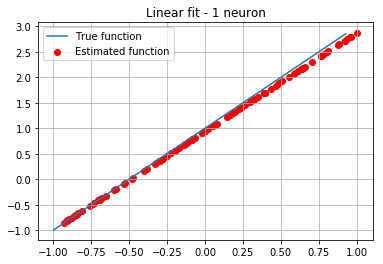

In [5]:
fit_lin(500, 50, 0.5, 30)

500 trains e 30 epoche sono sufficienti per fittare punti con sigma=0.5

#### trains=1000, valids=100, sigma=2, n_epochs=30 

Parametri stimati: 
[array([[2.0071497]], dtype=float32), array([1.0380181], dtype=float32)]
100/100 [==============================] - 0s 35us/sample - loss: 0.0014 - mean_squared_error: 0.0014

Test loss: 0.0014439745806157588
Test accuracy: 0.0014439746


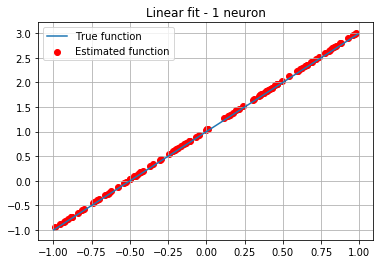

In [6]:
fit_lin(1000, 100, 2, 30)

Alzando i *trains* si fitta con estrema precisione anche punti distribuiti gaussianamente attorno alla retta con $sigma=2$.

#### trains=1000, valids=100, sigma=2, n_epochs=10 


Parametri stimati: 
[array([[1.8857062]], dtype=float32), array([1.0462059], dtype=float32)]
100/100 [==============================] - 0s 36us/sample - loss: 0.0076 - mean_squared_error: 0.0076

Test loss: 0.0076147812232375146
Test accuracy: 0.007614781


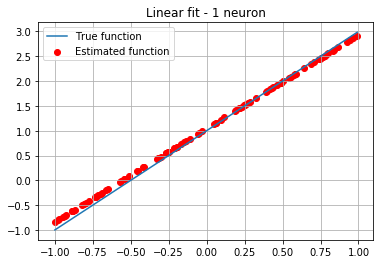

In [7]:
fit_lin(1000, 100, 2, 10)

Abbassando notevolmente le epoche, il fit perde parte della sua efficacia.

## <span style="color:blue">  Esercizio 11.2</span>


Ho fatto lo stesso per il polinomio
$$
f(x)=4-3x-2x^2+3x^3
$$
con $x \in [-1,1]$.


Ho costruito due funzioni con comportamento analogo alla precedente: una costruisce una erte neurale costituita da un singolo layer composto da un numero *neurons* di neuroni con funzione di attivazione *act* e una cche costruisce una rete neurale composta da più layers. 

In [9]:
def fit_poly (trains, valids, sigma, n_epochs, act, neurons):
    a=4
    b=-3
    c=-2
    d=3
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, trains)
    x_valid = np.random.uniform(-1, 1, valids)
    x_valid.sort()
    y_target = a + b * x_valid + c * np.power(x_valid,2) + d * np.power(x_valid,3) # ideal (target) polynomial
    
    y_train = np.random.normal( a + b * x_train + c * np.power(x_train,2) + d * np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal( a + b * x_valid + c * np.power(x_valid,2) + d * np.power(x_valid,3), sigma)
        
    model = tf.keras.Sequential()    
    model.add(Dense(neurons, input_shape=(1,), activation=act))
    model.add(Dense(1))
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=n_epochs,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid), verbose=0)
    #print(model.get_weights())
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', label='Estimated function')
    plt.plot(x_valid, y_target, label='True function')
    plt.grid(True)
    plt.title("Polynomial fit - 1 layer")
    plt.legend()
    plt.show()

#### act = tanh


100/100 [==============================] - 0s 35us/sample - loss: 0.0026 - mean_squared_error: 0.0026

Test loss: 0.0025850914046168325
Test accuracy: 0.0025850914


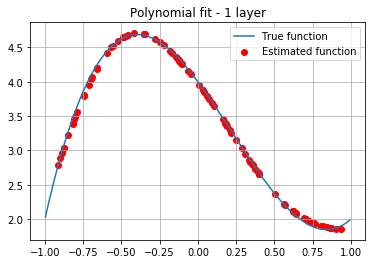

In [10]:
fit_poly(10000, 100, 0.2, 100, 'tanh', 25)

#### act = sigmoid

100/100 [==============================] - 0s 35us/sample - loss: 0.0394 - mean_squared_error: 0.0394

Test loss: 0.03935346374288201
Test accuracy: 0.039353468


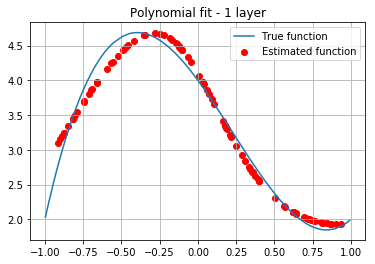

In [12]:
fit_poly(10000, 100, 0.2, 100, 'sigmoid', 25)

#### act = relu

100/100 [==============================] - 0s 165us/sample - loss: 0.0030 - mean_squared_error: 0.0030

Test loss: 0.0030053612403571606
Test accuracy: 0.0030053612


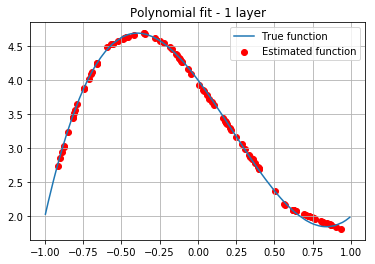

In [13]:
fit_poly(10000, 100, 0.2, 100, 'relu', 25)

Ho costruito reti neurali costituite da un singolo layer di 25 neuroni e l'output layer; si è tentato il fit con diverse funzioni di attivazione.

La convergenza migliore avviene scegliendo come funzione di attivazione la *tanh*.

Il fit è buono all'interno dell'intervallo, mentre è più carente avvicinandosi agli estremi: in particolare dove gli estremi presentano rapidi cambiamenti di pendenza, i punti di allenamento che vengono generati in prossimità dei bordi sono in numero troppo esiguo rispetto al totale perchè la rete impari a seguire tale cambio di pendenza.

100/100 [==============================] - 0s 39us/sample - loss: 0.0036 - mean_squared_error: 0.0036

Test loss: 0.0035839727520942687
Test accuracy: 0.0035839728


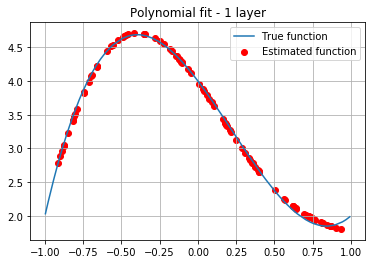

In [14]:
fit_poly(10000, 100, 0.2, 100, 'tanh', 4)

Il fit dà un buon risultato già con un layer costituito da soli 4 neuroni.

#### More layers 

In [35]:
def fit_poly_layers (trains, valids, sigma, n_epochs, act):
    a=4
    b=-3
    c=-2
    d=3
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, trains)
    x_valid = np.random.uniform(-1, 1, valids)
    x_valid.sort()
    y_target = a + b * x_valid + c * np.power(x_valid,2) + d * np.power(x_valid,3) # ideal (target) polynomial
    
    y_train = np.random.normal( a + b * x_train + c * np.power(x_train,2) + d * np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal( a + b * x_valid + c * np.power(x_valid,2) + d * np.power(x_valid,3), sigma)
        
    model = tf.keras.Sequential()    
    model.add(Dense(6, input_shape=(1,), activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(9, activation='tanh'))
    model.add(Dense(1))
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=n_epochs,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid), verbose=0)
    #print(model.get_weights())
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', label='Estimated function')
    plt.plot(x_valid, y_target, label='True function')
    plt.grid(True)
    plt.title("Polynomial fit - more layers")
    plt.legend()
    plt.show()

200/200 [==============================] - 0s 43us/sample - loss: 0.0014 - mean_squared_error: 0.0014 

Test loss: 0.0013861843664199113
Test accuracy: 0.0013861844


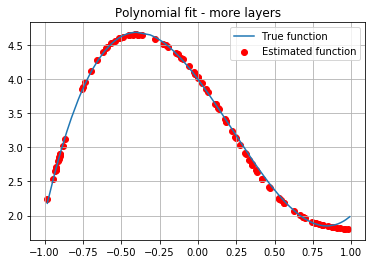

In [36]:
fit_poly_layers(20000, 200, 0.2, 100, 'tanh')

Ho provato ad osservare se l'ultima rete neurale proposta fosse in grado di proporre un buon andamento del fit anche al di fuori dell'intervallo di allenamento.
Tuttavia, anche se il modello fitta in modo accurato i punti nell'intervallo studiato, esso non è in grado di predirre in modo efficacie l'andamento della funzione all'infuori degli estremi tra i quali è stato eseguito l'allenamento.

In [22]:
def estimation (trains, valids, sigma, n_epochs, act):
    a=4
    b=-3
    c=-2
    d=3
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, trains)
    x_valid = np.random.uniform(-1.5, 1.5, valids)
    x_valid.sort()
    y_target = a + b * x_valid + c * np.power(x_valid,2) + d * np.power(x_valid,3) # ideal (target) polynomial
    
    y_train = np.random.normal( a + b * x_train + c * np.power(x_train,2) + d * np.power(x_train,3), sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal( a + b * x_valid + c * np.power(x_valid,2) + d * np.power(x_valid,3), sigma)
        
    model = tf.keras.Sequential()    
    model.add(Dense(6, input_shape=(1,), activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(9, activation='tanh'))
    model.add(Dense(1))
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=n_epochs,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid), verbose=0)
    #print(model.get_weights())

    x_predicted = np.random.uniform(-1.5, 1.5, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', label='Estimated function')
    plt.plot(x_valid, y_target, label='True function')
    plt.grid(True)
    plt.title("Estimation out of $[-1,1]$")
    plt.legend()
    plt.show()

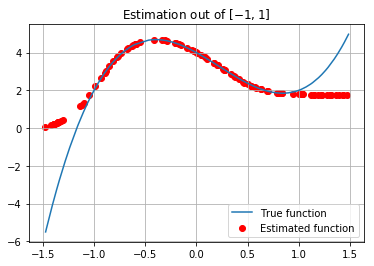

In [23]:
estimation(20000, 200, 0.2, 100, 'tanh')

## <span style="color:blue">  Esercizio 11.3</span>


Ho esteso il modello per la funzione bidimensionale $$f(x,y) = \sin(x^2+y^2)$$ con $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [31]:
def fit2D (trains, valids, sigma, n_epochs, act):
    # generate training inputs
    np.random.seed(0)
    x_train = 3*np.random.random_sample((trains, 2))-1.5  #2D
    x_valid = 3*np.random.random_sample((valids, 2))-1.5
    x_valid.sort()
    z_target = np.sin(x_valid[:,0]*x_valid[:,0]+x_valid[:,1]*x_valid[:,1]) # ideal (target) sin function
    
    z_train = np.random.normal( np.sin(x_train[:,0]*x_train[:,0]+x_train[:,1]*x_train[:,1]), sigma) # actual measures from which we want to guess regression parameters
    z_valid = np.random.normal( np.sin(x_valid[:,0]*x_valid[:,0]+x_valid[:,1]*x_valid[:,1]), sigma)
                
    model = tf.keras.Sequential()
    model.add(Dense(10, input_shape=(2,), activation='tanh'))
    model.add(Dense(12, activation=act))
    model.add(Dense(10, activation=act))
    model.add(Dense(6, activation=act))
    model.add(Dense(2, activation=act))
    model.add(Dense(1))
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    history = model.fit(x=x_train[:,:], y=z_train,
                        batch_size=32, epochs=n_epochs,
                        shuffle=True, # a good idea is to shuffle input before at each epoch
                        validation_data=(x_valid, z_valid),
                        verbose=0);
    # return weights
    #print(model.get_weights())
    
    x_predicted = 3*np.random.random_sample((1000, 2))-1.5
    z_predicted = model.predict(x_predicted[:,:])
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x_predicted[:,0], x_predicted[:,1], z_predicted,color='r', label='Estimated function')
    ax.scatter(x_predicted[:,0], x_predicted[:,1], np.sin(x_predicted[:,0]*x_predicted[:,0]+x_predicted[:,1]*x_predicted[:,1]), label='True function')
    plt.title('Fit with 5 layers')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

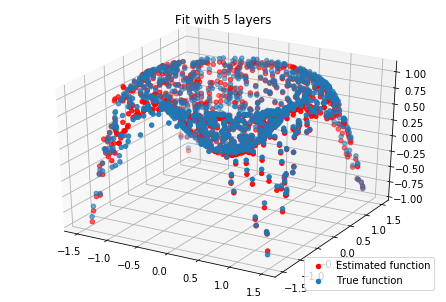

In [32]:
fit2D (10000, 1000, 0.1, 100, 'tanh')

Si è eseguito il fit della funzione bidimensionale attraverso la costruzione di una rete neuronale costituita da 5 layer (rispettiavemnete da 10,12,10,6,2) e il layer di output, con un numero di trains pari a 10000 e 100 epoche. 
